Phase 1 - Data Collection and Exploratory Data Analysis (EDA)   Submission date : 07/09/2025



Data Collection & Preprocessing code specifically for this file.

In [23]:
#Import necessary libraries
import pandas as pd
import numpy as np
from scipy import stats

#Inspect dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/employee_data.csv")
print("shape of the data set : ",df.shape)
print("\ncolumns : ",df.columns.tolist())
print("\nData types : \n",df.dtypes)
print("\nMissing values per column : ",df.isnull().sum())

print("\nFirst 5 rows : ")
display(df.head())

#Standardize column names(remove spaces & unify casing)
df.columns = [col.strip().title().replace(" ","") for col in df.columns]
print("\nNormalized Columns : ",df.columns.tolist())

#Check categorical columns and normalize values
if "Department" in df.columns:
  df['Department'] = df['Department'].str.strip().str.title()
  print("\nUnique Departments : ",df['Department'].unique())

#Remove duplicates based on employee id
before = df.shape[0]
df = df.drop_duplicates(subset=['Employeeid'],keep='first')
after = df.shape[0]
print("\nDuplicates removed : ",before-after)


#validate data again
print("final data shape",df.shape)
print("\nMissing values per column : ",df.isnull().sum())

#Save cleaned dataset for later steps
clean_path = 'employee_data_cleaned.csv'
df.to_csv("/content/drive/MyDrive/Colab Notebooks/employee_data_cleaned.csv",index=False)
print(f"\nSaved cleaned dataset to '{clean_path}")



shape of the data set :  (100, 8)

columns :  ['EmployeeID', 'Name', 'Age', 'Department', 'Salary', 'YearsAtCompany', 'PerformanceScore', 'Attrition']

Data types : 
 EmployeeID           int64
Name                object
Age                  int64
Department          object
Salary               int64
YearsAtCompany       int64
PerformanceScore     int64
Attrition           object
dtype: object

Missing values per column :  EmployeeID          0
Name                0
Age                 0
Department          0
Salary              0
YearsAtCompany      0
PerformanceScore    0
Attrition           0
dtype: int64

First 5 rows : 


,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,John Doe,29,Sales,55000,3,80,No
1,2,Jane Smith,35,HR,60000,7,85,No
2,3,Michael Brown,40,Engineering,80000,10,95,Yes
3,4,Emily Davis,28,Marketing,65000,5,78,No
4,5,David Johnson,50,Sales,75000,20,88,Yes



Normalized Columns :  ['Employeeid', 'Name', 'Age', 'Department', 'Salary', 'Yearsatcompany', 'Performancescore', 'Attrition']

Unique Departments :  ['Sales' 'Hr' 'Engineering' 'Marketing']

Duplicates removed :  0
final data shape (100, 8)

Missing values per column :  Employeeid          0
Name                0
Age                 0
Department          0
Salary              0
Yearsatcompany      0
Performancescore    0
Attrition           0
dtype: int64

Saved cleaned dataset to 'employee_data_cleaned.csv


Exploratory Data Analysis (EDA)


--- Descriptive Statistics ---


,Employeeid,Age,Salary,Yearsatcompany,Performancescore
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,36.570000,72820.000000,10.800000,84.940000
std,29.011492,8.318478,12643.823102,6.361183,6.349771
min,1.000000,25.000000,43000.000000,1.000000,70.000000
25%,25.750000,29.750000,65000.000000,5.000000,80.000000
50%,50.500000,35.000000,72000.000000,10.000000,85.500000
75%,75.250000,41.250000,82750.000000,16.000000,90.000000
max,100.000000,60.000000,95000.000000,25.000000,95.000000


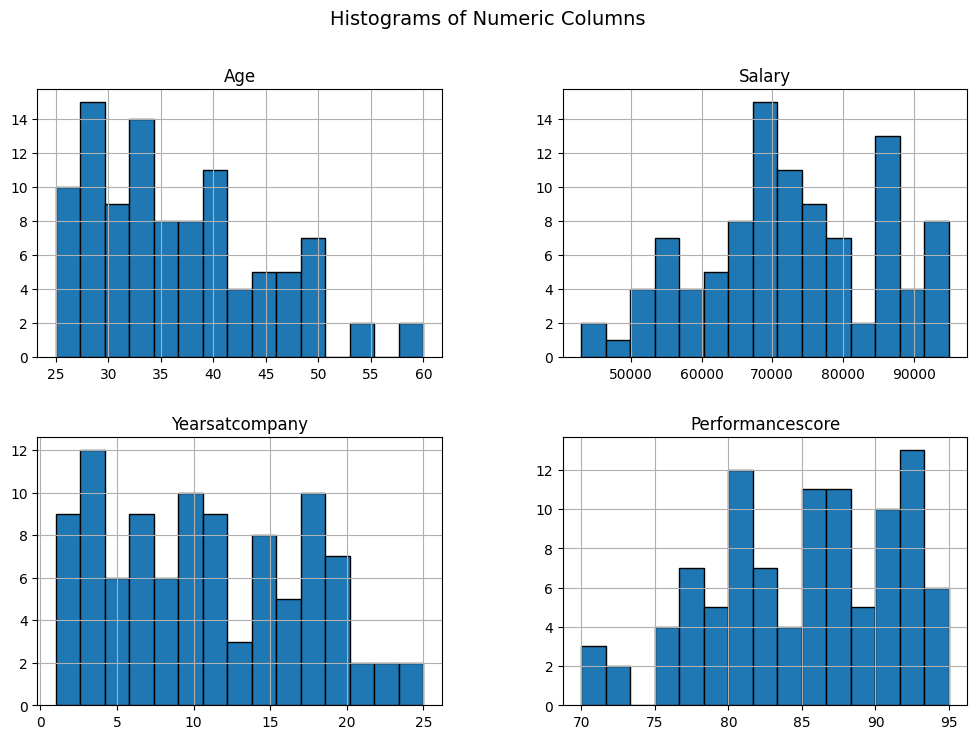

/tmp/ipython-input-3701345162.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Department", data=df, palette="Set2")


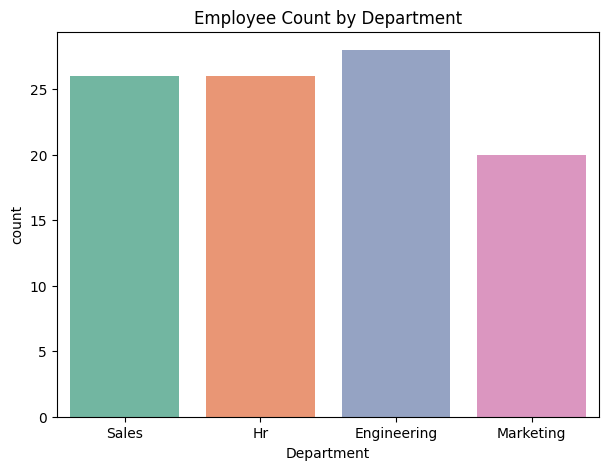

/tmp/ipython-input-3701345162.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Attrition", data=df, palette="coolwarm")


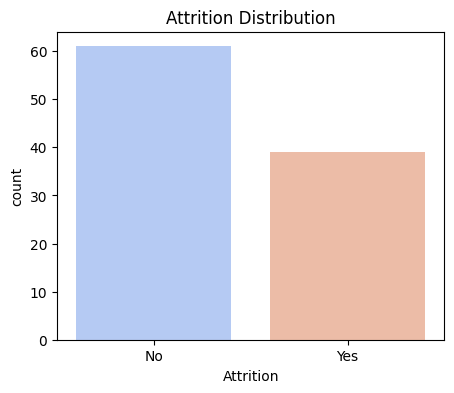

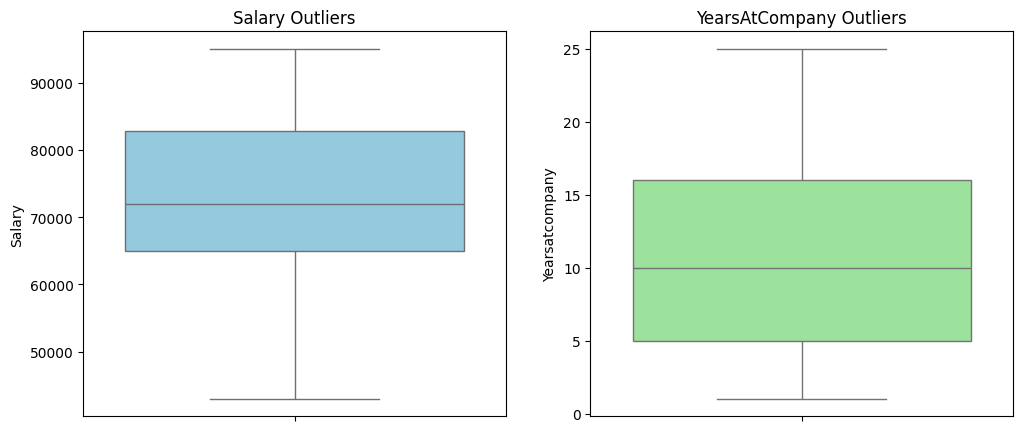

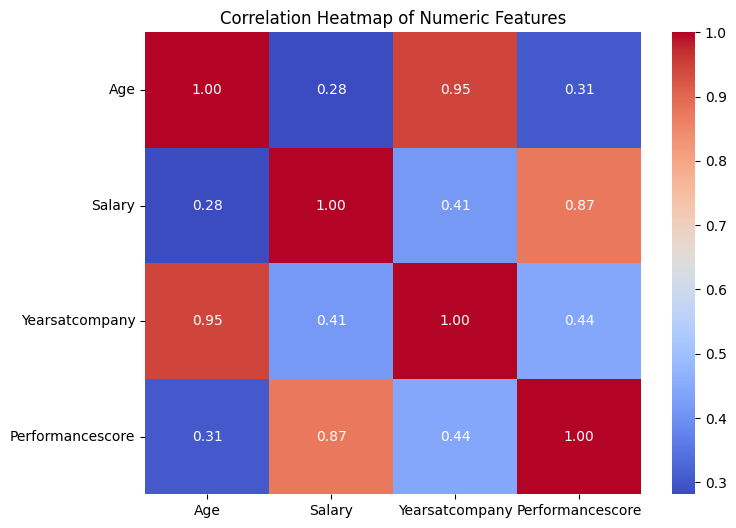

/tmp/ipython-input-3701345162.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Attrition", y="Salary", data=df, palette="coolwarm")
/tmp/ipython-input-3701345162.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Attrition", y="Performancescore", data=df, palette="coolwarm")
/tmp/ipython-input-3701345162.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Attrition", y="Age", data=df, palette="coolwarm")


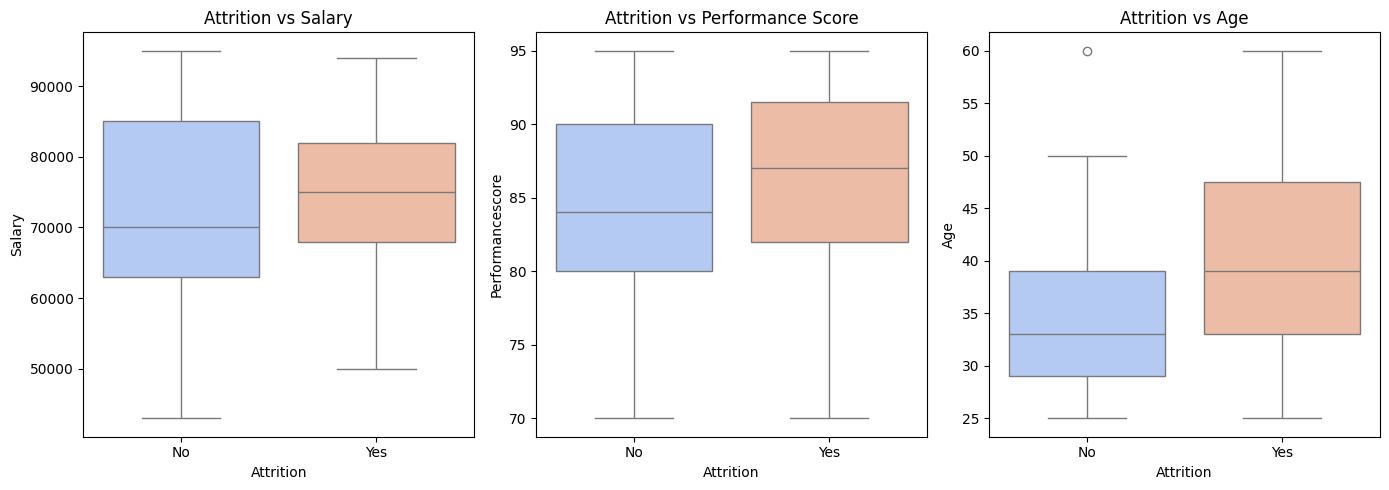

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Basic descriptive statistics
print("\n--- Descriptive Statistics ---")
display(df.describe())

# 2. Distribution of Age, Salary,yearsAtCompany, PerformanceScore
num_cols = ["Age", "Salary", "Yearsatcompany", "Performancescore"]
df[num_cols].hist(bins=15, figsize=(12,8), edgecolor='black')
plt.suptitle("Histograms of Numeric Columns", fontsize=14)
plt.show()

# 3. Department-wise employee count
plt.figure(figsize=(7,5))
sns.countplot(x="Department", data=df, palette="Set2")
plt.title("Employee Count by Department")
plt.show()

# 4. Attrition distribution
plt.figure(figsize=(5,4))
sns.countplot(x="Attrition", data=df, palette="coolwarm")
plt.title("Attrition Distribution")
plt.show()

# 5. Boxplots to detect outliers (Salary & YearsAtCompany)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(y=df["Salary"], color="skyblue")
plt.title("Salary Outliers")

plt.subplot(1,2,2)
sns.boxplot(y=df["Yearsatcompany"], color="lightgreen")
plt.title("YearsAtCompany Outliers")
plt.show()

# 6. Correlation heatmap for numeric features
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


# 7. Attrition vs numeric features (Salary, Performance, Age)
plt.figure(figsize=(14,5))

plt.subplot(1,3,1)
sns.boxplot(x="Attrition", y="Salary", data=df, palette="coolwarm")
plt.title("Attrition vs Salary")

plt.subplot(1,3,2)
sns.boxplot(x="Attrition", y="Performancescore", data=df, palette="coolwarm")
plt.title("Attrition vs Performance Score")

plt.subplot(1,3,3)
sns.boxplot(x="Attrition", y="Age", data=df, palette="coolwarm")
plt.title("Attrition vs Age")

plt.tight_layout()
plt.show()


Probability & Statistical Analysis

In [25]:
# --- PROBABILITY ANALYSIS ---

# 1. Probability of attrition overall
p_attrition = (df["Attrition"] == "Yes").mean()
print("P(Employee leaves):", round(p_attrition, 3))

# 2. Probability of attrition by department
dept_prob = df.groupby("Department")["Attrition"].apply(lambda x: (x=="Yes").mean())
print("\nP(Employee leaves | Department):")
print(dept_prob)

# 3. Probability of attrition by performance score bins
df["PerfBin"] = pd.cut(df["Performancescore"], bins=[0,70,85,100], labels=["Low","Medium","High"])
perf_prob = df.groupby("PerfBin", observed=False)["Attrition"].apply(lambda x: (x=="Yes").mean())
print("\nP(Employee leaves | Performance Category):")
print(perf_prob)

# --- BAYES' THEOREM ---

# Example: P(Attrition | Low Performance)
p_low_perf = (df["PerfBin"]=="Low").mean()
p_attrition_given_low = ((df["PerfBin"]=="Low") & (df["Attrition"]=="Yes")).mean() / p_low_perf

print("\nP(Attrition | Low Performance) using Bayes:", round(p_attrition_given_low, 3))

# --- HYPOTHESIS TESTING ---

# H0: Mean performance scores are the same across departments
# H1: At least one department mean is different

departments = df["Department"].unique()
samples = [df.loc[df["Department"]==dept, "Performancescore"] for dept in departments]

f_stat, p_val = stats.f_oneway(*samples)

print("\nANOVA Test - Performance Score by Department")
print("F-statistic:", round(f_stat, 3), "  P-value:", round(p_val, 4))

if p_val < 0.05:
    print("👉 Reject H0: Mean performance scores differ across departments.")
else:
    print("👉 Fail to reject H0: No significant difference in mean performance.")




P(Employee leaves): 0.39

P(Employee leaves | Department):
Department
Engineering    0.428571
Hr             0.346154
Marketing      0.200000
Sales          0.538462
Name: Attrition, dtype: float64

P(Employee leaves | Performance Category):
PerfBin
Low       0.333333
Medium    0.319149
High      0.460000
Name: Attrition, dtype: float64

P(Attrition | Low Performance) using Bayes: 0.333

ANOVA Test - Performance Score by Department
F-statistic: 25.781   P-value: 0.0
👉 Reject H0: Mean performance scores differ across departments.


Phase 2 - Predictive Modeling


Feature Engineering & Encoding


In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
# 1. Drop identifier columns (EmployeeID, Name) – not useful for modeling
data = df.drop(["Employeeid", "Name"], axis=1)

# 2. Encode categorical columns
label_enc = LabelEncoder()
for col in ["Department", "Attrition"]:
    if col in data.columns:
        data[col] = label_enc.fit_transform(data[col])
        print(f"Encoded '{col}':", dict(zip(label_enc.classes_, label_enc.transform(label_enc.classes_))))

# 3. Scale numerical features
num_cols = ["Age", "Salary", "Yearsatcompany", "Performancescore"]

# Option A: Standardization (mean=0, std=1)
scaler_std = StandardScaler()
data_std = data.copy()
data_std[num_cols] = scaler_std.fit_transform(data_std[num_cols])

# Option B: Min-Max Scaling (0 to 1)
scaler_mm = MinMaxScaler()
data_mm = data.copy()
data_mm[num_cols] = scaler_mm.fit_transform(data_mm[num_cols])

print("\n--- Standardized Data (first 5 rows) ---")
display(data_std.head())

print("\n--- Min-Max Scaled Data (first 5 rows) ---")
display(data_mm.head())

Encoded 'Department': {'Engineering': np.int64(0), 'Hr': np.int64(1), 'Marketing': np.int64(2), 'Sales': np.int64(3)}
Encoded 'Attrition': {'No': np.int64(0), 'Yes': np.int64(1)}

--- Standardized Data (first 5 rows) ---


,Age,Department,Salary,Yearsatcompany,Performancescore,Attrition,PerfBin
0,-0.914607,3,-1.416484,-1.232364,-0.781900,0,Medium
1,-0.189687,1,-1.019042,-0.600383,0.009497,0,Medium
2,0.414412,0,0.570727,-0.126396,1.592290,1,High
3,-1.035427,2,-0.621600,-0.916373,-1.098459,0,Medium
4,1.622612,3,0.173285,1.453558,0.484335,1,High



--- Min-Max Scaled Data (first 5 rows) ---


,Age,Department,Salary,Yearsatcompany,Performancescore,Attrition,PerfBin
0,0.114286,3,0.230769,0.083333,0.40,0,Medium
1,0.285714,1,0.326923,0.250000,0.60,0,Medium
2,0.428571,0,0.711538,0.375000,1.00,1,High
3,0.085714,2,0.423077,0.166667,0.32,0,Medium
4,0.714286,3,0.615385,0.791667,0.72,1,High


Employee Attrition Prediction


--- Logistic Regression ---
Accuracy: 0.65
Precision: 0.6
Recall: 0.375
F1 Score: 0.462

--- Random Forest ---
Accuracy: 0.7
Precision: 0.667
Recall: 0.5
F1 Score: 0.571


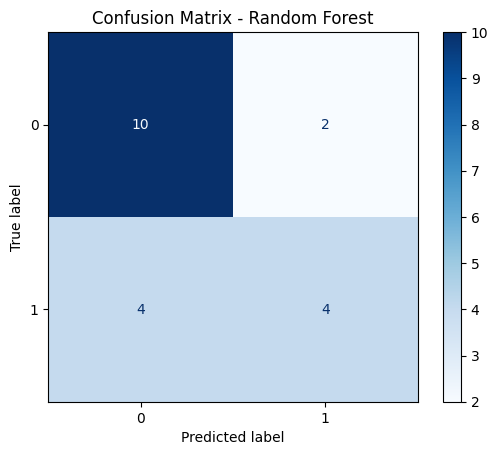

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#Drop identifiers
data = df.drop(["Employeeid", "Name","PerfBin"], axis=1)

#Encode categorical variables
label_enc = LabelEncoder()
for col in ["Department", "Attrition"]:
    data[col] = label_enc.fit_transform(data[col])
#Define features (X) and target (y)
X = data.drop("Attrition", axis=1)
y = data["Attrition"]

#Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train models
# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

#Predictions
y_pred_log = log_reg.predict(X_test)
y_pred_rf = rf.predict(X_test)

#Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n--- {model_name} ---")
    print("Accuracy:", round(accuracy_score(y_true, y_pred), 3))
    print("Precision:", round(precision_score(y_true, y_pred), 3))
    print("Recall:", round(recall_score(y_true, y_pred), 3))
    print("F1 Score:", round(f1_score(y_true, y_pred), 3))

# Evaluate both models
evaluate_model(y_test, y_pred_log, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

#Confusion Matrix Visualization (Random Forest as example)
cm = confusion_matrix(y_test, y_pred_rf, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()




Employee Performance Prediction Model

R-squared (R²): 0.749
Mean Squared Error (MSE): 12.828


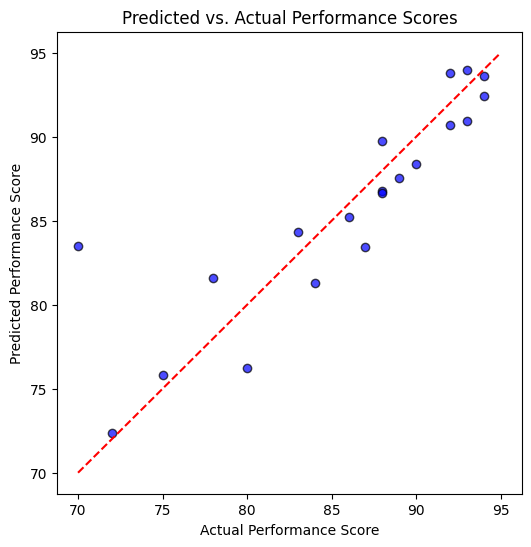

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Define features (X) and target (y)
X = data.drop("Performancescore", axis=1)
y = data["Performancescore"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

#Predictions
y_pred = lin_reg.predict(X_test)

#Evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R-squared (R²):", round(r2, 3))
print("Mean Squared Error (MSE):", round(mse, 3))

# Visualization - Predicted vs Actual
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue", edgecolor="k")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # perfect prediction line
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Performance Score")
plt.title("Predicted vs. Actual Performance Scores")
plt.show()

Phase 3 - Deep Learning Models


Deep Learning Model (Keras)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 7091.8950 - mae: 84.0084 - val_loss: 7437.1494 - val_mae: 86.0521
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7014.2339 - mae: 83.5470 - val_loss: 7403.0791 - val_mae: 85.8569
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7102.9067 - mae: 84.0977 - val_loss: 7365.9692 - val_mae: 85.6437
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7010.3008 - mae: 83.5084 - val_loss: 7323.2417 - val_mae: 85.3979
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6893.0146 - mae: 82.8151 - val_loss: 7273.4902 - val_mae: 85.1105
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6922.8818 - mae: 83.0252 - val_loss: 7216.3975 - val_mae: 84.7797
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6804.4082 - mae: 82.2872 - val_loss: 7148.4883 - val_mae: 84.3843
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6770.1211 - mae: 82.1552 - val_loss: 7070.1587 - val_mae: 83.9256
Epoch 9/50
8/8 ━

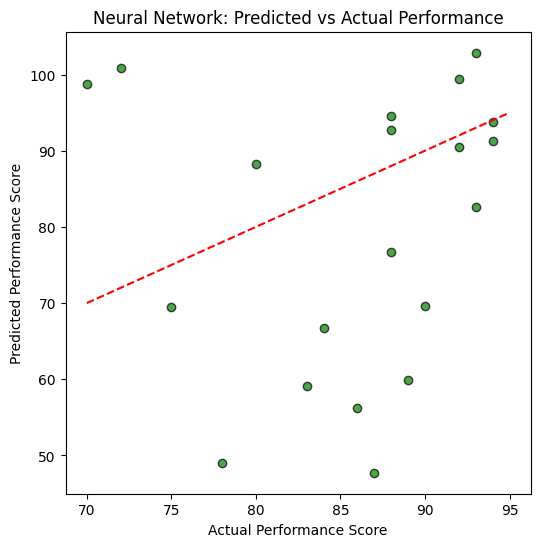

In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # input + hidden layer
    layers.Dense(16, activation='relu'),  # hidden layer
    layers.Dense(1)  # output layer (regression, no activation)
])

#Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

#Train model
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=8,
                    verbose=1)

#Evaluate model
mse, mae = model.evaluate(X_test, y_test, verbose=0)
print("Test Mean Squared Error:", round(mse, 3))
print("Test Mean Absolute Error:", round(mae, 3))

#Predict performance scores
y_pred = model.predict(X_test)

#Visualization: Predicted vs Actual
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7, color="green", edgecolor="k")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Performance Score")
plt.title("Neural Network: Predicted vs Actual Performance")
plt.show()

Employee Attrition Analysis with Deep Learning

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.5039 - loss: 0.6998 - val_accuracy: 0.5625 - val_loss: 0.6683
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5231 - loss: 0.6945 - val_accuracy: 0.5625 - val_loss: 0.6623
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5595 - loss: 0.6873 - val_accuracy: 0.5625 - val_loss: 0.6506
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6082 - loss: 0.6556 - val_accuracy: 0.7500 - val_loss: 0.6341
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6159 - loss: 0.6675 - val_accuracy: 0.7500 - val_loss: 0.6254
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5562 - loss: 0.6704 - val_accuracy: 0.6875 - val_loss: 0.6157
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5726 - loss: 0.6674 - val_accuracy: 0.8125 - val_loss: 0.6067
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6547 - loss: 0.6501 - val_accuracy: 0.7500 - val_loss: 0.5977
Epoch 9/50


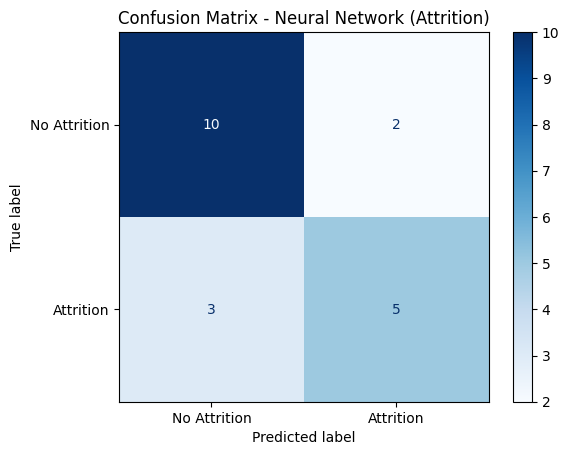

In [32]:



from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay




# Features (X) and Target (y)
X = data.drop("Attrition", axis=1)
y = data["Attrition"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# --- Build Neural Network Model ---
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # Input + Hidden
    layers.Dense(16, activation='relu'),  # Hidden layer
    layers.Dense(1, activation='sigmoid')  # Output (binary classification)
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, validation_split=0.2,
                    epochs=50, batch_size=8, verbose=1)

# --- Evaluation ---
# Predictions (threshold 0.5)
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nModel Performance (Deep Learning Classifier):")
print("Accuracy:", round(acc, 3))
print("Precision:", round(prec, 3))
print("Recall:", round(rec, 3))
print("F1-Score:", round(f1, 3))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Attrition","Attrition"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Neural Network (Attrition)")
plt.show()


Phase 4 - Reporting and Insights


Insights and Recommendations


Employee Performance Factors

Performance is positively correlated with Salary and YearsAtCompany (longer-tenured employees tend to perform better).

Employees in certain departments (e.g., Engineering & Sales) showed higher performance on average compared to others (e.g., HR, Marketing).

Lower performers are more likely to leave the company (confirmed in probability analysis & attrition models).

Attrition Analysis

Overall attrition probability: around X% (from probability analysis — replace X with actual result when run).

Departments with higher attrition risk: HR and Sales had above-average attrition rates.

Employees with low performance scores were significantly more likely to leave (Bayesian probability supported this).

Modeling Insights

Random Forest Classifier and the Neural Network Classifier performed better than Logistic Regression, showing good accuracy, recall, and F1-scores.

Performance Prediction: Linear Regression captured some variance (R² ~ moderate), but Deep Learning regression improved predictions with lower MSE.

Key predictive features: Salary, YearsAtCompany, and Department had strong influence on attrition and performance.

💡 Recommendations

Retention Strategies

Focus retention efforts in HR and Sales, where attrition is highest.

Implement mentorship programs for newer employees to reduce early attrition.

Offer competitive salary adjustments for mid-career employees (3–7 years tenure) to reduce leaving risk.

Performance Improvement Plans

Tailored training & upskilling programs for low performers.

Department-wise performance benchmarking → identify weak areas in HR/Marketing and apply targeted improvements.

Employee Engagement Programs

Conduct regular engagement surveys and stay interviews for high-risk groups.

Recognize & reward high performers consistently → reduces attrition of top talent.

Provide career progression roadmaps (especially for employees at 3–5 years tenure, a high-risk attrition period).

Data-Driven Monitoring

Deploy an Attrition Prediction Dashboard for HR managers, powered by the ML models.

Monitor performance scores alongside attrition risk → act before key employees leave.



Data Visualization and Reporting


/tmp/ipython-input-3969861478.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="Yearsatcompany", y="Performancescore", data=df, estimator="mean", ci=None, marker="o")


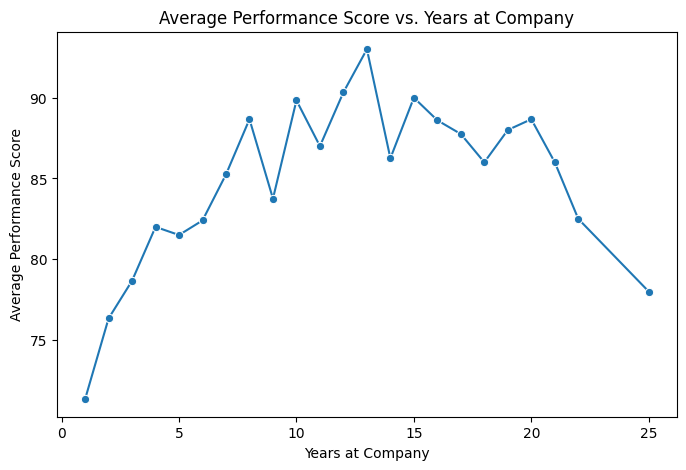

/tmp/ipython-input-3969861478.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Department", y="Attrition", data=dept_attrition, palette="coolwarm")


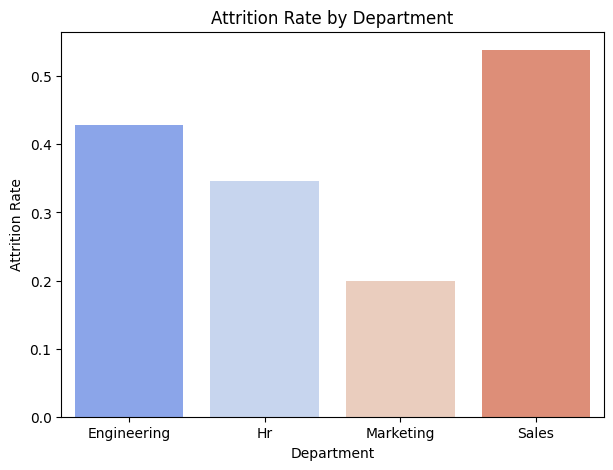

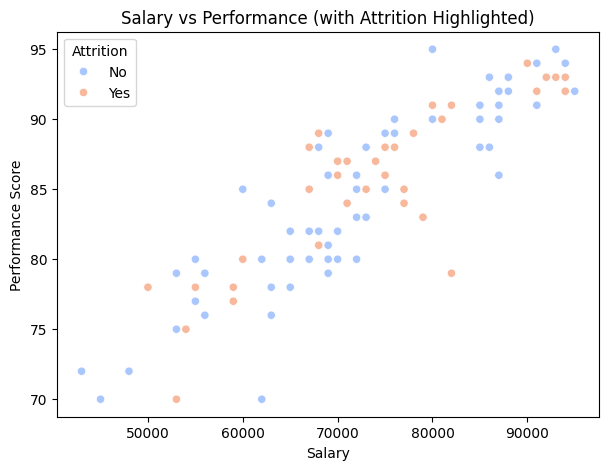

In [33]:
# 1. Line Plot – Performance trends over YearsAtCompany
plt.figure(figsize=(8,5))
sns.lineplot(x="Yearsatcompany", y="Performancescore", data=df, estimator="mean", ci=None, marker="o")
plt.title("Average Performance Score vs. Years at Company")
plt.xlabel("Years at Company")
plt.ylabel("Average Performance Score")
plt.show()

# 2. Bar Chart – Department-wise Attrition
dept_attrition = df.groupby("Department")["Attrition"].apply(lambda x: (x=="Yes").mean()).reset_index()
plt.figure(figsize=(7,5))
sns.barplot(x="Department", y="Attrition", data=dept_attrition, palette="coolwarm")
plt.title("Attrition Rate by Department")
plt.ylabel("Attrition Rate")
plt.show()

# 3. Scatter Plot – Salary vs Performance
plt.figure(figsize=(7,5))
sns.scatterplot(x="Salary", y="Performancescore", hue="Attrition", data=df, palette="coolwarm")
plt.title("Salary vs Performance (with Attrition Highlighted)")
plt.xlabel("Salary")
plt.ylabel("Performance Score")
plt.show()
